## 一、FLDA特征提取

前面已经获得预处理后的训练数据，首先导入需要的库

In [41]:
import numpy as np
from sklearn.preprocessing import StandardScaler

#### 1、获取数字化后的图像训练数据  
注意处理图像数据时，其第一列是图像的编号，不是特征值，为了方便降维和送入分类器，需要删掉这一列。

In [42]:
f = open("faceR","r",encoding="utf8")
x = f.read()
f.close()
x = x.split() #默认删除所有空字符，包括空格和换行符等
x = np.array(list(float(char) for char in x)) #字符串列表转数组
x.resize((1996,100)) #转为二维数组
xtrain = x
print('图像训练数据xtrain:\n',xtrain,xtrain.shape)
xtrain = np.delete(xtrain,0,axis=1) #删除第一列：图片编号
print('\nxtrain去编号后：\n',xtrain,xtrain.shape)
#标准化图像训练数据
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
n_features = xtrain.shape[1]
n_samples = xtrain.shape[0]
print('\nxtrain标准化后：\n',xtrain,"\n特征数：",n_features,"\n样本数：",n_samples)

图像训练数据xtrain:
 [[ 1.22300000e+03 -1.77961902e+03  2.10730127e+03 ... -8.61942370e+01
   1.28772320e+01  2.38823390e+01]
 [ 1.22400000e+03 -2.71997339e+03  2.97884375e+03 ... -4.68737700e+00
  -4.28034670e+01  1.19861970e+01]
 [ 1.22500000e+03 -9.46141785e+02 -1.17116028e+03 ...  6.00232730e+01
   2.21902800e+00  1.66275270e+01]
 ...
 [ 3.22000000e+03  1.07736768e+03 -6.24962646e+02 ...  3.08739870e+01
  -1.76446100e+00  6.32692180e+01]
 [ 3.22100000e+03  1.62751266e+02  1.92902429e+03 ...  1.28961792e+02
   5.91272430e+01 -5.73871399e+02]
 [ 3.22200000e+03 -6.97708984e+02 -2.36467910e+01 ... -9.68876270e+01
  -1.05578690e+02  1.03433350e+02]] (1996, 100)

xtrain去编号后：
 [[-1.77961902e+03  2.10730127e+03  8.07759949e+02 ... -8.61942370e+01
   1.28772320e+01  2.38823390e+01]
 [-2.71997339e+03  2.97884375e+03 -1.22765790e+01 ... -4.68737700e+00
  -4.28034670e+01  1.19861970e+01]
 [-9.46141785e+02 -1.17116028e+03  5.57305603e+02 ...  6.00232730e+01
   2.21902800e+00  1.66275270e+01]
 ...
 [ 

#### 2、获取预处理后的标签训练数据

In [43]:
f = open("faceDR","r",encoding="utf8")
y = f.read()
f.close()
y = y.split() #默认删除所有空字符，包括空格和换行符等
#print(y)
del y[0]
#print(y)
y = np.array(y)
y.resize((1996,5))
ytrain = y
print('标签训练数据ytrain:\n',ytrain,ytrain.shape)

标签训练数据ytrain:
 [['1223' 'male' 'child' 'white' 'smiling']
 ['1224' 'male' 'child' 'white' 'serious']
 ['1225' 'male' 'child' 'white' 'smiling']
 ...
 ['3220' 'female' 'adult' 'asian' 'serious']
 ['3221' 'female' 'senior' 'white' 'smiling']
 ['3222' 'female' 'senior' 'black' 'serious']] (1996, 5)


In [44]:
#性别分类
print('\n性别分类ytrain_sex:\n',ytrain[:,1],ytrain[:,1].shape)
#年龄分类
print('\n年龄分类ytrain_age:\n',ytrain[:,2],ytrain[:,2].shape)
#种族分类
print('\n种族分类ytrain_race:\n',ytrain[:,3],ytrain[:,3].shape)
#表情分类
print('\n表情分类ytrain_face:\n',ytrain[:,4],ytrain[:,4].shape)


性别分类ytrain_sex:
 ['male' 'male' 'male' ... 'female' 'female' 'female'] (1996,)

年龄分类ytrain_age:
 ['child' 'child' 'child' ... 'adult' 'senior' 'senior'] (1996,)

种族分类ytrain_race:
 ['white' 'white' 'white' ... 'asian' 'white' 'black'] (1996,)

表情分类ytrain_face:
 ['smiling' 'serious' 'smiling' ... 'serious' 'smiling' 'serious'] (1996,)


#### 3、获取预处理后的测试数据

In [45]:
f = open("faceS","r",encoding="utf8")
x2 = f.read()
f.close()
x2 = x2.split() #默认删除所有空字符，包括空格和换行符等
x2 = np.array(list(float(char) for char in x2)) #字符串列表转数组
x2.resize((1996,100)) #转为二维数组
xtest = x2
print('图像测试数据xtest:\n',xtest,xtest.shape)
xtest = np.delete(xtest,0,axis=1) #删除第一列：图片编号
print('\nxtest去编号后：\n',xtest,xtest.shape)
xtest = scaler.fit_transform(xtest)
print('\nxtest标准化后：\n',xtest)

图像测试数据xtest:
 [[ 3223.        1509.810059  -258.181854 ...  -156.00473    -24.142797
    -30.994535]
 [ 3224.        1887.549927  -604.501404 ...   -84.800957    54.544933
     10.758374]
 [ 3225.         479.281891  1204.433105 ...   -84.359192   -47.144707
    -29.58638 ]
 ...
 [ 5220.         765.723267   152.202209 ...   -10.661225    71.933243
    139.105927]
 [ 5221.        3535.591553 -1172.505737 ...    69.269463   -67.06485
     62.041889]
 [ 5222.        -742.207458   106.262558 ...    36.534725    23.340706
   -101.602966]] (1996, 100)

xtest去编号后：
 [[ 1509.810059  -258.181854 -1190.012451 ...  -156.00473    -24.142797
    -30.994535]
 [ 1887.549927  -604.501404    49.436756 ...   -84.800957    54.544933
     10.758374]
 [  479.281891  1204.433105  -623.750671 ...   -84.359192   -47.144707
    -29.58638 ]
 ...
 [  765.723267   152.202209   345.341125 ...   -10.661225    71.933243
    139.105927]
 [ 3535.591553 -1172.505737  -298.611542 ...    69.269463   -67.06485
     62.041

#### 4、获取标签测试数据

In [46]:
f = open("faceDS","r",encoding="utf8")
y2 = f.read()
f.close()
y2 = y2.split() #默认删除所有空字符，包括空格和换行符等
#del y2[0]  #faceDS文件比faceDR文件少了第一个多余的字符串，所以不用del掉。建议此处先print测试一下
y2 = np.array(y2)
y2.resize((1996,5))
ytest = y2
print('标签测试数据ytest:\n',ytest,ytest.shape)

标签测试数据ytest:
 [['3223' 'female' 'senior' 'black' 'smiling']
 ['3224' 'female' 'adult' 'black' 'smiling']
 ['3225' 'male' 'senior' 'white' 'smiling']
 ...
 ['5220' 'female' 'adult' 'white' 'serious']
 ['5221' 'female' 'adult' 'white' 'smiling']
 ['5222' 'female' 'adult' 'white' 'smiling']] (1996, 5)


In [47]:
#性别分类
print('\n性别分类ytest_sex:\n',ytest[:,1],ytest[:,1].shape)
#年龄分类
print('\n年龄分类ytest_age:\n',ytest[:,2],ytest[:,2].shape)
#种族分类
print('\n种族分类ytest_race:\n',ytest[:,3],ytest[:,3].shape)
#表情分类
print('\n表情分类ytest_face:\n',ytest[:,4],ytest[:,4].shape)


性别分类ytest_sex:
 ['female' 'female' 'male' ... 'female' 'female' 'female'] (1996,)

年龄分类ytest_age:
 ['senior' 'adult' 'senior' ... 'adult' 'adult' 'adult'] (1996,)

种族分类ytest_race:
 ['black' 'black' 'white' ... 'white' 'white' 'white'] (1996,)

表情分类ytest_face:
 ['smiling' 'smiling' 'smiling' ... 'serious' 'smiling' 'smiling'] (1996,)


以上的代码实现了读取4个存储了预处理后的数据的文件的功能。

#### 5、创建LDA模型降维并训练

不同于PCA用于无监督学习的特征提取，FLDA适用于监督学习的特征提取，即需要标签y一起送入LDA模型中训练。  
因此，一定要确保图像数据和标签数据的个数一样，且壹壹对应。

In [48]:
#创建性别分类的LDA模型降维并训练
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda_sex = LDA(n_components=1) #监督学习下的FLDA特征提取，数据降维后的维数受特征维数和类别数的限制；PCA较自由
lda_sex.fit(xtrain,ytrain[:,1])
#将训练好的LDA模型对数据进行特征提取
xtrain_sex = lda_sex.transform(xtrain)
xtest_sex = lda_sex.transform(xtest)
print('用训练后的性别分类LDA模型降维后的图像训练数据和测试数据：',xtrain_sex.shape,xtest_sex.shape)

用训练后的性别分类LDA模型降维后的图像训练数据和测试数据： (1996, 1) (1996, 1)


In [49]:
#创建年龄分类的LDA模型降维并训练
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda_age = LDA(n_components=2)
lda_age.fit(xtrain,ytrain[:,2])
#将训练好的LDA模型对数据进行特征提取
xtrain_age = lda_age.transform(xtrain)
xtest_age = lda_age.transform(xtest)
print('用训练后的年龄分类LDA模型降维后的图像训练数据和测试数据：',xtrain_age.shape,xtest_age.shape)

用训练后的年龄分类LDA模型降维后的图像训练数据和测试数据： (1996, 2) (1996, 2)


In [50]:
#创建种族分类的LDA模型降维并训练
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda_race = LDA(n_components=6)
lda_race.fit(xtrain,ytrain[:,3])
#将训练好的LDA模型对数据进行特征提取
xtrain_race = lda_race.transform(xtrain)
xtest_race = lda_race.transform(xtest)
print('用训练后的种族分类LDA模型降维后的图像训练数据和测试数据：',xtrain_race.shape,xtest_race.shape)

用训练后的种族分类LDA模型降维后的图像训练数据和测试数据： (1996, 6) (1996, 6)


In [51]:
#创建表情分类的LDA模型降维并训练
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda_face = LDA(n_components=2)
lda_face.fit(xtrain,ytrain[:,4])
#将训练好的LDA模型对数据进行特征提取
xtrain_face = lda_face.transform(xtrain)
xtest_face = lda_face.transform(xtest)
print('用训练后的表情分类LDA模型降维后的图像训练数据和测试数据：',xtrain_face.shape,xtest_face.shape)

用训练后的表情分类LDA模型降维后的图像训练数据和测试数据： (1996, 2) (1996, 2)


## 二、FLDA分类器及其交叉验证

虽然LDA模型更多用于特征提取，但本身可以用于分类，这也是FLDA的特点之一。下面是LDA直接用于分类的代码。

In [52]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

1. 性别分类：

In [53]:
##########性别分类##########
lda_sex = LDA(n_components=1)
lda_sex.fit(xtrain,ytrain[:,1])
lda_sex.predict(xtest) #训练好的LDA模型直接用于分类
print('LDA分类——性别分类分数',lda_sex.score(xtest,ytest[:,1]))

LDA分类——性别分类分数 0.7049098196392786


2. 年龄分类：

In [54]:
##########年龄分类##########
lda_age = LDA(n_components=2)
lda_age.fit(xtrain,ytrain[:,2])
lda_age.predict(xtest)
print('LDA分类——年龄分类分数',lda_age.score(xtest,ytest[:,2]))

LDA分类——年龄分类分数 0.8081162324649298


3. 种族分类：

In [55]:
##########种族分类##########
lda_race = LDA(n_components=6)
lda_race.fit(xtrain,ytrain[:,3])
lda_race.predict(xtest)
print('LDA分类——种族分类分数',lda_race.score(xtest,ytest[:,3]))

LDA分类——种族分类分数 0.844689378757515


4. 表情分类：

In [56]:
##########表情分类##########
lda_face = LDA(n_components=2)
lda_face.fit(xtrain,ytrain[:,4])
lda_face.predict(xtest)
print('LDA分类——表情分类分数',lda_face.score(xtest,ytest[:,4]))

LDA分类——表情分类分数 0.7695390781563126


5. 五折交叉验证LDA在分类上的准确率：

In [58]:
#合并x数据和y数据
X = np.concatenate([xtrain,xtest],axis=0)
Y = np.concatenate([ytrain,ytest],axis=0)
print('所有图像数据：\n',X,X.shape,'\n所有标签数据：\n',Y,Y.shape)

所有图像数据：
 [[-0.7150059   1.44885637  0.76471857 ... -0.73084344  0.03944986
   0.13721498]
 [-1.15504469  2.06241286 -0.08316677 ...  0.1045747  -0.53830313
   0.03210577]
 [-0.32498026 -0.85914513  0.50575868 ...  0.76783728 -0.07114159
   0.07311457]
 ...
 [ 0.26054715 -0.31819057  0.46323974 ... -0.22319601  0.58655735
   0.95461083]
 [ 1.20349938 -1.27928629 -0.19565995 ...  0.66274007 -0.95181123
   0.24443456]
 [-0.25280096 -0.35152049  0.50628644 ...  0.29991465  0.04875693
  -1.26361894]] (3992, 99) 
所有标签数据：
 [['1223' 'male' 'child' 'white' 'smiling']
 ['1224' 'male' 'child' 'white' 'serious']
 ['1225' 'male' 'child' 'white' 'smiling']
 ...
 ['5220' 'female' 'adult' 'white' 'serious']
 ['5221' 'female' 'adult' 'white' 'smiling']
 ['5222' 'female' 'adult' 'white' 'smiling']] (3992, 5)


In [59]:
kfold = KFold(n_splits=5,shuffle=True,random_state=42)
sex_result = cross_val_score(lda_sex,X,Y[:,1],cv=kfold)
print('性别LDA分类交叉验证结果：%0.2f(±%0.2f)'%(sex_result.mean(),sex_result.std()*2))
age_result = cross_val_score(lda_age,X,Y[:,2],cv=kfold)
print('年龄LDA分类交叉验证结果：%0.2f(±%0.2f)'%(age_result.mean(),age_result.std()*2))
race_result = cross_val_score(lda_race,X,Y[:,3],cv=kfold)
print('种族LDA分类交叉验证结果：%0.2f(±%0.2f)'%(race_result.mean(),race_result.std()*2))
face_result = cross_val_score(lda_face,X,Y[:,4],cv=kfold)
print('表情LDA分类交叉验证结果：%0.2f(±%0.2f)'%(face_result.mean(),face_result.std()*2))

性别LDA分类交叉验证结果：0.80(±0.02)
年龄LDA分类交叉验证结果：0.84(±0.02)
种族LDA分类交叉验证结果：0.92(±0.02)
表情LDA分类交叉验证结果：0.79(±0.02)


6. 绘制分数对比图

In [60]:
import matplotlib
import matplotlib.pyplot as plt

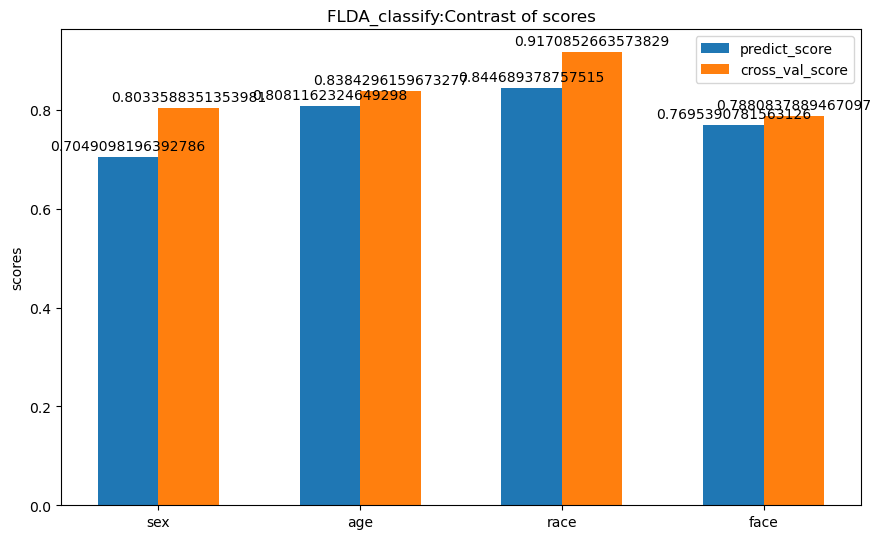

In [61]:
plt.rcParams['savefig.dpi'] = 100 #图片像素
plt.rcParams['figure.dpi'] = 100 #分辨率
plt.rcParams['figure.figsize'] = (9.0, 5.5)
fig,ax = plt.subplots()
#绘制Bar
labels = ['sex',"age",'race','face']
num = np.arange(4)
result1 = np.array([lda_sex.score(xtest,ytest[:,1]),lda_age.score(xtest,ytest[:,2]),lda_race.score(xtest,ytest[:,3]),lda_face.score(xtest,ytest[:,4])])
result2 = np.array([sex_result.mean(),age_result.mean(),race_result.mean(),face_result.mean()])
rects1 = ax.bar(num-0.3/2,result1,width = 0.3,label = 'predict_score')
rects2 = ax.bar(num+0.3/2,result2,width=0.3,label = 'cross_val_score')

ax.set_ylabel("scores")
ax.set_title("FLDA_classify:Contrast of scores")
ax.set_xticks(num)
ax.set_xticklabels(labels)
ax.legend()
#绘制标签
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2,height),
                   xytext=(0,3),
                   textcoords="offset points",
                   ha='center',va='bottom')
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.savefig("FLDA_classify.jpg")
plt.show()

## 三、Bayes分类器及其交叉验证

In [65]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

标签数据预处理（朴素贝叶斯可以处理标称标签，不需要转成数值）  
le = LabelEncoder()  
ytrain_sex = le.fit_transform(ytrain[:,1])  
ytrain_age = le.fit_transform(ytrain[:,2])  
ytrain_race = le.fit_transform(ytrain[:,3])  
ytrain_face = le.fit_transform(ytrain[:,4])  
ytest_sex = le.fit_transform(ytest[:,1])  
ytest_age = le.fit_transform(ytest[:,2])  
ytest_race = le.fit_transform(ytest[:,3])  
ytest_face = le.fit_transform(ytest[:,4])  

1. 性别分类

In [66]:
bys_sex = GaussianNB().fit(xtrain_sex, ytrain[:,1]) #默认alpha=1.0，拉普拉斯平滑
bys_sex.predict(xtest_sex)
print('BAYES分类——性别分类分数',bys_sex.score(xtest_sex,ytest[:,1]))

BAYES分类——性别分类分数 0.7039078156312625


2. 年龄分类

In [67]:
bys_age = GaussianNB().fit(xtrain_age, ytrain[:,2]) #默认alpha=1.0，拉普拉斯平滑
bys_age.predict(xtest_age)
print('BAYES分类——年龄分类分数',bys_age.score(xtest_age,ytest[:,2]))

BAYES分类——年龄分类分数 0.8226452905811623


3. 种族分类

In [68]:
bys_race = GaussianNB().fit(xtrain_race, ytrain[:,3]) #默认alpha=1.0，拉普拉斯平滑
bys_race.predict(xtest_race)
print('BAYES分类——种族分类分数',bys_race.score(xtest_race,ytest[:,3]))

BAYES分类——种族分类分数 0.8502004008016032


4. 表情分类

In [69]:
bys_face = GaussianNB().fit(xtrain_face, ytrain[:,4]) #默认alpha=1.0，拉普拉斯平滑
bys_face.predict(xtest_face)
print('BAYES分类——表情分类分数',bys_face.score(xtest_face,ytest[:,4]))

BAYES分类——表情分类分数 0.7700400801603207


5. 五折交叉验证Bayes在分类上的准确率

In [70]:
sex_result = cross_val_score(bys_sex,X,Y[:,1],cv=kfold)
print('性别BAYES分类交叉验证结果：%0.2f(±%0.2f)'%(sex_result.mean(),sex_result.std()*2))
age_result = cross_val_score(bys_age,X,Y[:,2],cv=kfold)
print('年龄BAYES分类交叉验证结果：%0.2f(±%0.2f)'%(age_result.mean(),age_result.std()*2))
race_result = cross_val_score(bys_race,X,Y[:,3],cv=kfold)
print('种族BAYES分类交叉验证结果：%0.2f(±%0.2f)'%(race_result.mean(),race_result.std()*2))
face_result = cross_val_score(bys_face,X,Y[:,4],cv=kfold)
print('表情BAYES分类交叉验证结果：%0.2f(±%0.2f)'%(face_result.mean(),face_result.std()*2))

性别BAYES分类交叉验证结果：0.66(±0.03)
年龄BAYES分类交叉验证结果：0.63(±0.07)
种族BAYES分类交叉验证结果：0.88(±0.03)
表情BAYES分类交叉验证结果：0.53(±0.03)


6. 绘制分数对比图

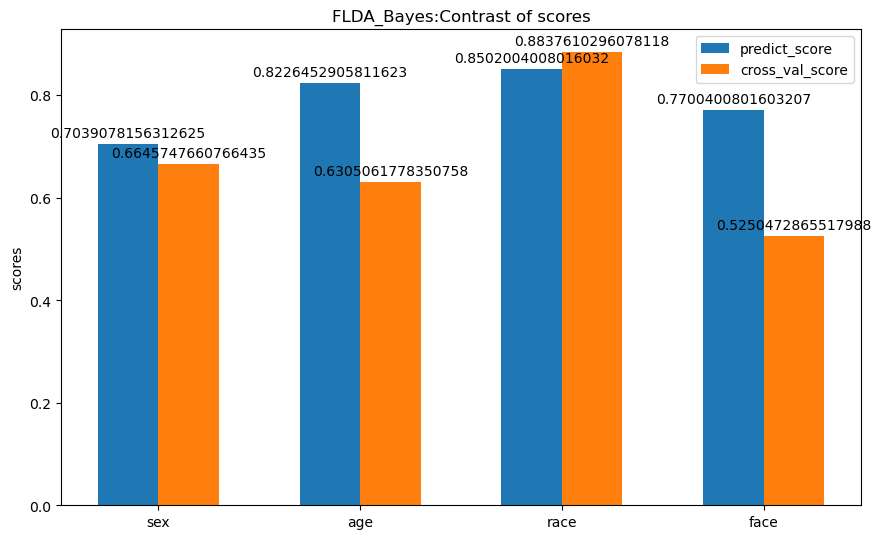

In [71]:
fig,ax = plt.subplots()
#绘制Bar
labels = ['sex',"age",'race','face']
num = np.arange(4)
result1 = np.array([bys_sex.score(xtest_sex,ytest[:,1]),bys_age.score(xtest_age,ytest[:,2]),bys_race.score(xtest_race,ytest[:,3]),bys_face.score(xtest_face,ytest[:,4])])
result2 = np.array([sex_result.mean(),age_result.mean(),race_result.mean(),face_result.mean()])
rects1 = ax.bar(num-0.3/2,result1,width = 0.3,label = 'predict_score')
rects2 = ax.bar(num+0.3/2,result2,width=0.3,label = 'cross_val_score')

ax.set_ylabel("scores")
ax.set_title("FLDA_Bayes:Contrast of scores")
ax.set_xticks(num)
ax.set_xticklabels(labels)
ax.legend()
#绘制标签
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2,height),
                   xytext=(0,3),
                   textcoords="offset points",
                   ha='center',va='bottom')
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.savefig("FLDA_Bayes.jpg")
plt.show()

## 四、KNN分类器及其交叉验证

In [84]:
from sklearn.neighbors import KNeighborsClassifier

1. 性别分类

In [73]:
knn_sex = KNeighborsClassifier().fit(xtrain_sex, ytrain[:,1])
print('KNN分类——性别分类分数',knn_sex.score(xtest_sex,ytest[:,1]))

KNN分类——性别分类分数 0.6923847695390781


2. 年龄分类

In [85]:
knn_age = KNeighborsClassifier().fit(xtrain_age, ytrain[:,2])
print('KNN分类——年龄分类分数',knn_age.score(xtest_age,ytest[:,2]))

KNN分类——年龄分类分数 0.8041082164328658


3. 种族分类

In [86]:
knn_race = KNeighborsClassifier().fit(xtrain_race, ytrain[:,3])
print('KNN分类——种族分类分数',knn_race.score(xtest_race,ytest[:,3]))

KNN分类——种族分类分数 0.8582164328657315


4. 表情分类

In [87]:
knn_face =  KNeighborsClassifier().fit(xtrain_face, ytrain[:,4])
print('KNN分类——表情分类分数',knn_face.score(xtest_face,ytest[:,4]))

KNN分类——表情分类分数 0.7299599198396793


5. 五折交叉验证KNN在分类上的准确率

In [88]:
sex_result = cross_val_score(knn_sex,X,Y[:,1],cv=kfold)
print('性别KNN分类交叉验证结果：%0.2f(±%0.2f)'%(sex_result.mean(),sex_result.std()*2))
age_result = cross_val_score(knn_age,X,Y[:,2],cv=kfold)
print('年龄KNN分类交叉验证结果：%0.2f(±%0.2f)'%(age_result.mean(),age_result.std()*2))
race_result = cross_val_score(knn_race,X,Y[:,3],cv=kfold)
print('种族KNN分类交叉验证结果：%0.2f(±%0.2f)'%(race_result.mean(),race_result.std()*2))
face_result = cross_val_score(knn_face,X,Y[:,4],cv=kfold)
print('表情KNN分类交叉验证结果：%0.2f(±%0.2f)'%(face_result.mean(),face_result.std()*2))

性别KNN分类交叉验证结果：0.77(±0.02)
年龄KNN分类交叉验证结果：0.82(±0.03)
种族KNN分类交叉验证结果：0.90(±0.01)
表情KNN分类交叉验证结果：0.64(±0.03)


6. 绘制分数对比图

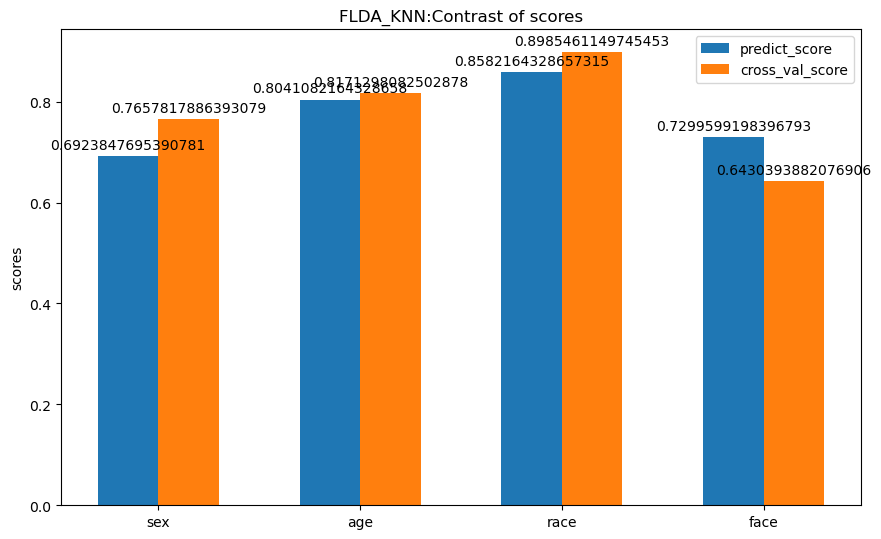

In [89]:
fig,ax = plt.subplots()
#绘制Bar
labels = ['sex',"age",'race','face']
num = np.arange(4)
result1 = np.array([knn_sex.score(xtest_sex,ytest[:,1]),knn_age.score(xtest_age,ytest[:,2]),knn_race.score(xtest_race,ytest[:,3]),knn_face.score(xtest_face,ytest[:,4])])
result2 = np.array([sex_result.mean(),age_result.mean(),race_result.mean(),face_result.mean()])
rects1 = ax.bar(num-0.3/2,result1,width = 0.3,label = 'predict_score')
rects2 = ax.bar(num+0.3/2,result2,width=0.3,label = 'cross_val_score')

ax.set_ylabel("scores")
ax.set_title("FLDA_KNN:Contrast of scores")
ax.set_xticks(num)
ax.set_xticklabels(labels)
ax.legend()
#绘制标签
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2,height),
                   xytext=(0,3),
                   textcoords="offset points",
                   ha='center',va='bottom')
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.savefig("FLDA_KNN.jpg")
plt.show()